From Rxx, and Gideon, I learned about this applied SME signal boosting on quadradic funding. 

It means that the quadradic funding algorithm is weighted heavier from donors that qualify as SME.

Congrats to the TEC coordination team for pulling this off. They pulled this off on round 1.

Let's apply engineering to this process.

Engineering is about the production of artifacts in a safe and ethical way. 

Artifacts have interfaces that people may use. Engineering allows the usage of interfaces without bad things happening.



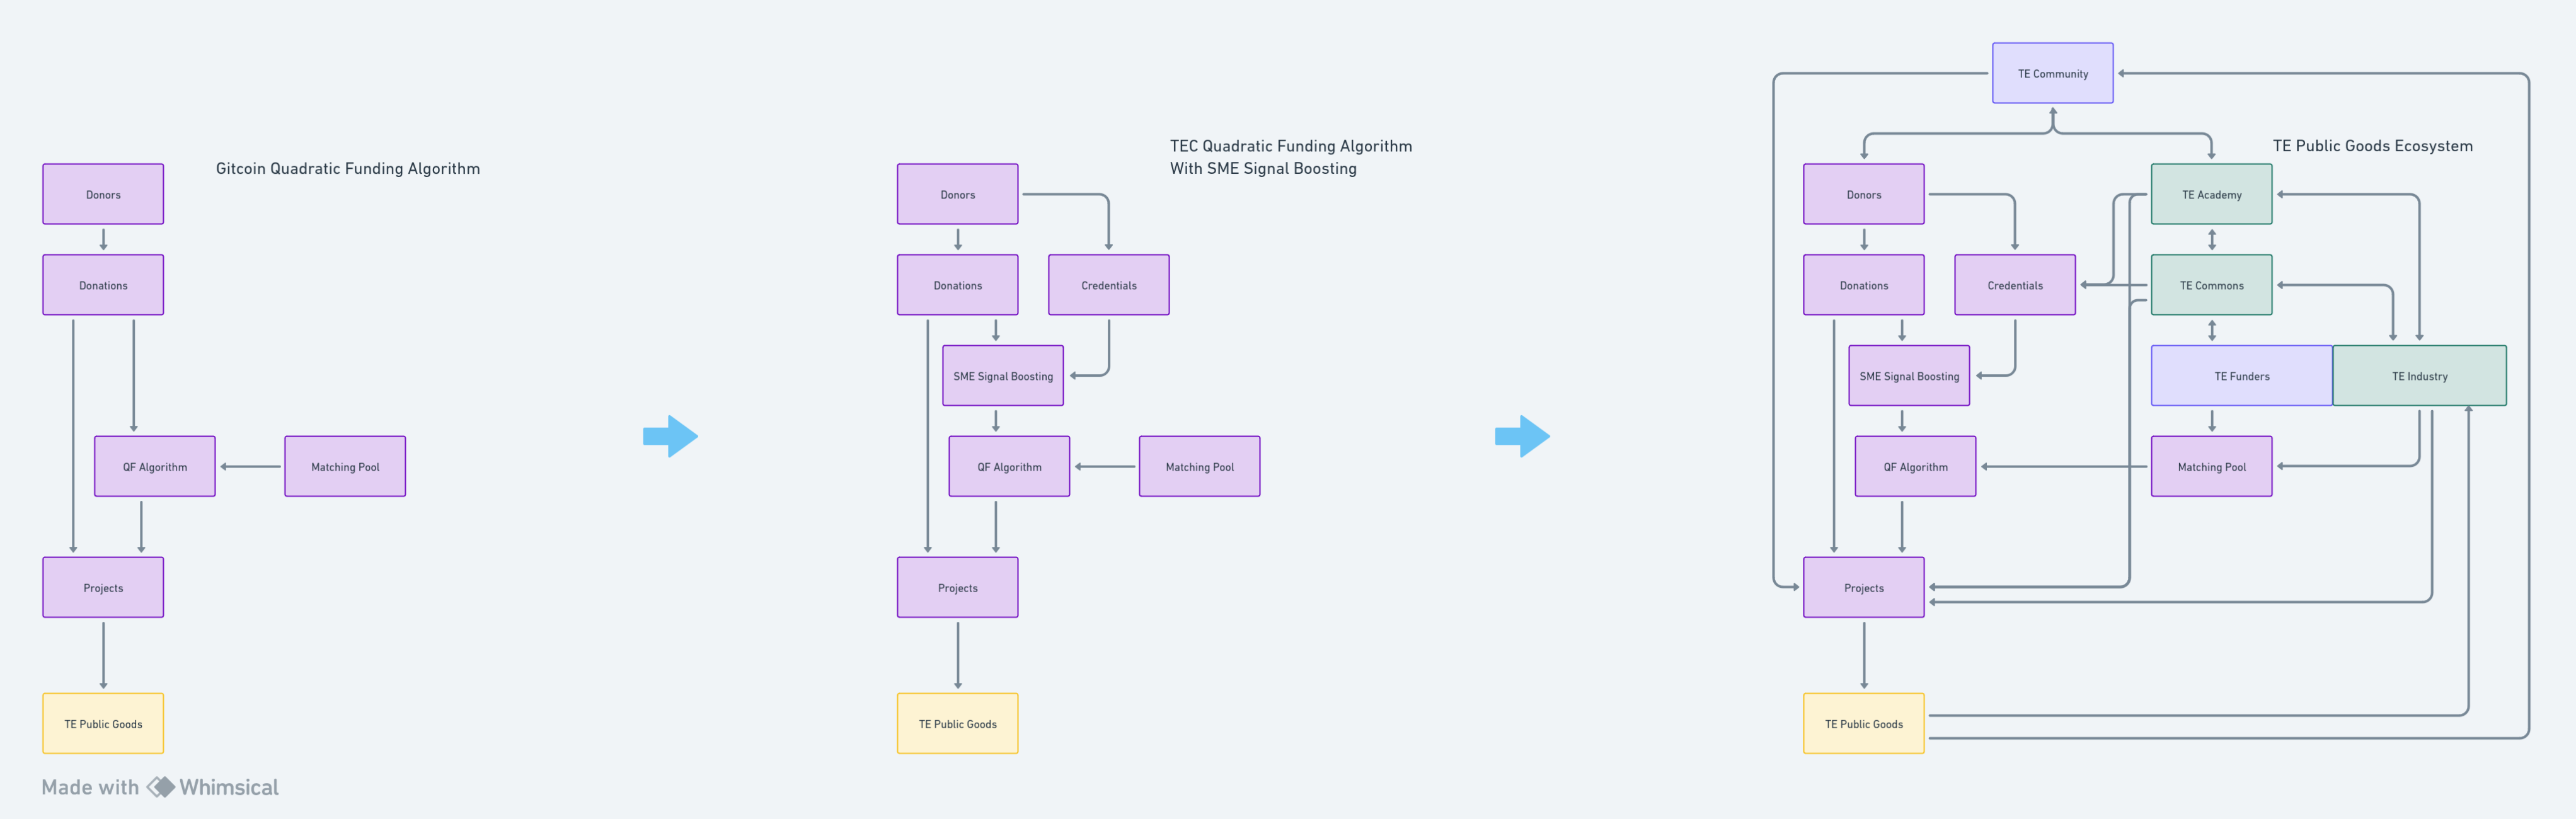![image.png]()

Link to the above board: https://whimsical.com/original-qfsme-mechanism-flowchart-QjXRdbkFmBcXBhnV175K9z 

Resources


* https://arxiv.org/pdf/2010.01193.pdf
* https://arxiv.org/pdf/1809.06421.pdf
* https://vitalik.ca/general/2019/12/07/quadratic.html
* https://qf.gitcoin.co/?grant=&grant=&grant=&match=1000
* https://medium.com/token-engineering-commons/expertise-and-quadratic-funding-bd4f0c5c3e23 

The following is a data science illustration of The foundational paper on FDFPGs. This is meant to be part one of a two part paper review, with a future modeling of Quadratic Funding and Matching Funds Requirments by Pasquini at Gitcoin. 

This worik is for educational purposes in the domain of token engineering. This work is meant to illustrate a data science approach to systems based modeling. This work is in the domain of digital signal processing, with primary foundations in machine learning, big data, data science, economics, and computing science, as those are the backgrounds of the primary authors. This work is funded by  with the Token Engineering Commons and Griff Green. 

# A Flexible Design for Funding Public Goods

Bhuterin, Hitzig, Weyl on A Flexible Design for Funding Public Goods. 

https://arxiv.org/pdf/1809.06421.pdf

The following is a data science illustration of The foundational paper on FDFPGs. This is meant to be part one of a two part paper review, with a future modeling of Quadratic Funding and Matching Funds Requirments by Pasquini at Gitcoin. 

This worik is for educational purposes in the domain of token engineering. This work is meant to illustrate a data science approach to systems based modeling. This work is in the domain of digital signal processing, with primary foundations in machine learning, big data, data science, economics, and computing science, as those are the backgrounds of the primary authors. This work is funded by  with the Token Engineering Commons and Griff Green. 

## 3.0 Model

This is the foundational setup in the paper.

In [1]:
import numpy as np

# Number of Citizens in the Society
N = 30

# Society is a set of citizens
society = list(range(N))

# Community is a random subset of the society. The community size is from 25 up to size of the society.
community = np.random.choice(a=list(society), size=np.random.randint(25, len(society)), replace=False, p=None)

# Public Goods are proposed by community members. Cardinality is from 20 up to size of the community.
public_goods = list(enumerate(np.random.choice(a=list(community), size=np.random.randint(20, len(community)), replace=True, p=None)))

In [2]:
community

array([19,  5,  0,  4,  8, 28, 16,  1, 20, 17, 29, 26, 14,  9, 10, 27,  2,
       11, 21,  3, 15, 18, 12,  6, 25,  7, 13])

In [3]:
public_goods

[(0, 1),
 (1, 10),
 (2, 18),
 (3, 0),
 (4, 25),
 (5, 13),
 (6, 14),
 (7, 12),
 (8, 20),
 (9, 7),
 (10, 19),
 (11, 27),
 (12, 20),
 (13, 21),
 (14, 8),
 (15, 0),
 (16, 2),
 (17, 18),
 (18, 2),
 (19, 1),
 (20, 17),
 (21, 12)]

In [4]:
len(society)

30

In [5]:
len(community)

27

In [6]:
len(public_goods)

22

## 3.1 Individual Preferences and Actions

### Value Function Generators

The paper calls for 
* Concave, 
* Smooth, 
* Increasing preferences towards the funding of public goods.

The following function generator, generates value functions in the domain of {[0,1],[0,1]}.

In [7]:
import param
import numpy as np
import panel as pn
import hvplot.pandas
import pandas as pd

class ConcaveFunctionGenerator(param.Parameterized):
    f0 = param.Number(default=0.2, bounds=(0, 1), doc="Value of f(0)")
    f1 = param.Number(default=0.8, bounds=(0, 1), softbounds=(0, 1), doc="Value of f(1)")
    steepness = param.Number(default=5, bounds=(1, 20), doc="Steepness of the curve")

    def __init__(self, **params):
        super().__init__(**params)
        self._update_f1_bounds()

    @param.depends('f0', watch=True)
    def _update_f1_bounds(self):
        # Clip the value of f1 if it's below f0
        self.f1 = max(self.f0, self.f1)
        
        # Update the lower bound of f1 to be the value of f0
        self.param['f1'].bounds = (self.f0, 1)
        
    def x(self):
        return np.linspace(0, 1, 400)

    @param.depends('f0', 'f1', 'steepness')
    def f(self, x):
        # Using the negative exponential function as a base
        y = 1 - np.exp(-self.steepness * x)
        
        # Adjusting the function to start at f0 and end at f1
        y = self.f0 + (self.f1 - self.f0) * (y - y.min()) / (y.max() - y.min())
        
        return y

    @param.depends('f0', 'f1', 'steepness')
    def view(self):
        x = self.x()
        y = self.f(x)
        df = pd.DataFrame({'x': x, 'y': y})
        return df.hvplot.line(x='x', y='y', ylim=(0, 1.01))

concave_gen = ConcaveFunctionGenerator()
pn.Row(concave_gen.param, concave_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='ConcaveFunctionGenerator'...)
        [0] StaticText(value='<b>ConcaveFunctionGenerat...)
        [1] FloatSlider(name='F0', value=0.2)
        [2] FloatSlider(name='F1', start=0.2, value=0.8)
        [3] FloatSlider(end=20, name='Steepness', start=1, value=5)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

The concave value generator has the following properties:
1. f0 = f(0) is in [0,1]
2. f1 = f(1) is in [f0,1]
3. f(x) = 1 - e**(-s*x)
4. The negative exponential function provides a smooth, concave, increasing function from f0 to f1 with a parameterized steepness.

The class dynamically clips f1 to satisfy property 2. Such as in the following example:

In [8]:
ConcaveFunctionGenerator(f0=1,f1=0)

ConcaveFunctionGenerator(f0=1, f1=1, name='ConcaveFunctionGenerator00955', steepness=5)

Here we propose parameter generators for sampling concave functions

In [9]:
import numbergen as ng
import numpy as np


# For CurveGenerator
def concave_function_parameters_generator():
    return dict(
        f0=ng.BoundedNumber(generator=ng.NormalRandom(mu=0.1, sigma=0.3), bounds=(0,1))(),
        f1=ng.BoundedNumber(generator=ng.NormalRandom(mu=0.5, sigma=0.4), bounds=(0,1))(),
        steepness=ng.UniformRandom(lbound=1, ubound=20)(),
    )

This method generates random parameters given the distributions described for f0, f1, and steepness above. 
* f0 is a normal distribution at (0.1,0.3), clipped at (0,1)
* f0 is a normal distribution at (0.5,0.4), clipped at (0,1)
* steepness is a uniform distribution at (1,20)

In [10]:
concave_function_parameters_generator()

{'f0': 0.03858067758858275,
 'f1': 0.27301823392862107,
 'steepness': 2.7211150402775948}

In [11]:
value_functions = [ConcaveFunctionGenerator(**concave_function_parameters_generator()) for p_i in range(len(public_goods)*len(society))]

Here we can see all of the preferences of the citizens. These are the value functions V_p_i(F_p). There is one preference function for each V_p_i in {public_goods}X{citizens}. Cardinality is len(public_goods)*len(citizens).

#### Visualizing Sampled Value Functions

In [12]:
import pandas as pd

pd.DataFrame([s.param.values() for s in value_functions])

sample_p_i_slider = pn.widgets.IntSlider(name='Utility Value Function', start=0, end=len(value_functions)-1)

pn.Row(sample_p_i_slider, pn.bind(lambda i: value_functions[i].view(), i=sample_p_i_slider))

Row
    [0] IntSlider(end=659, name='Utility Value Function')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

#### Value Functions Dataset

Create a Dataframe! These are citizen preferences by funding amounts for public goods. Take Funding Amount as the Index by applying a transpose. 

In [13]:
df_value_functions = pd.DataFrame([s.f(s.x()) for s in value_functions])
df_value_functions = df_value_functions.T
df_value_functions.shape

(400, 660)

Make Funding the Index from 0 to 100

In [14]:
df_value_functions.index = np.linspace(0,1,len(df_value_functions))
df_value_functions.index.name = "funding"

Label the Columns by {public_goods}X{Citizens}.

In [15]:
df_value_functions.columns = [(p, i) for p in public_goods for i in society]
df_value_functions.columns.name = "value_p_i"

Number of columns is len(public_goods)*len(society).

In [16]:
df_value_functions

value_p_i,"((0, 1), 0)","((0, 1), 1)","((0, 1), 2)","((0, 1), 3)","((0, 1), 4)","((0, 1), 5)","((0, 1), 6)","((0, 1), 7)","((0, 1), 8)","((0, 1), 9)",...,"((21, 12), 20)","((21, 12), 21)","((21, 12), 22)","((21, 12), 23)","((21, 12), 24)","((21, 12), 25)","((21, 12), 26)","((21, 12), 27)","((21, 12), 28)","((21, 12), 29)"
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,0.094057,0.197011,0.000000,0.000000,0.129128,0.192478,0.000000,0.000000,0.309152,0.237605,...,0.246655,0.289851,0.620418,0.28907,0.238472,0.134923,0.079019,0.000000,0.227868,0.000000
0.002506,0.094057,0.197011,0.004986,0.027960,0.129128,0.192478,0.008151,0.006957,0.311166,0.253016,...,0.248318,0.291240,0.629768,0.28907,0.238472,0.143174,0.089772,0.013892,0.242953,0.007110
0.005013,0.094057,0.197011,0.009948,0.054588,0.129128,0.192478,0.016199,0.013863,0.313175,0.268116,...,0.249963,0.292614,0.638888,0.28907,0.238472,0.151348,0.100357,0.027185,0.257734,0.014100
0.007519,0.094057,0.197011,0.014885,0.079948,0.129128,0.192478,0.024147,0.020717,0.315179,0.282909,...,0.251592,0.293973,0.647783,0.28907,0.238472,0.159445,0.110777,0.039903,0.272217,0.020970
0.010025,0.094057,0.197011,0.019799,0.104100,0.129128,0.192478,0.031995,0.027521,0.317178,0.297402,...,0.253204,0.295318,0.656460,0.28907,0.238472,0.167468,0.121036,0.052072,0.286408,0.027724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,0.094057,0.197011,0.875602,0.586934,0.129128,0.192478,0.645557,0.888688,0.804334,0.997764,...,0.404827,0.416610,0.999998,0.28907,0.238472,0.999191,0.769835,0.321723,0.975867,0.417230
0.992481,0.094057,0.197011,0.876329,0.586934,0.129128,0.192478,0.645612,0.889056,0.805046,0.997768,...,0.404855,0.416629,0.999999,0.28907,0.238472,0.999396,0.769857,0.321723,0.975872,0.417238
0.994987,0.094057,0.197011,0.877052,0.586934,0.129128,0.192478,0.645667,0.889421,0.805755,0.997773,...,0.404882,0.416648,0.999999,0.28907,0.238472,0.999599,0.769879,0.321723,0.975877,0.417246


Display Citizen Preferences for Funding.

In [17]:
# Takes rendering time.
# df_value_functions.hvplot.line(x='funding', color='blue', alpha=0.1, line_width=3, ylabel='Value to Citizens', title='Smooth, Concave, Increasing Value Functions')

Mean preferences for funding public goods.

In [18]:
df_value_functions['mean'] = df_value_functions.mean(axis=1)
df_value_functions['std'] = df_value_functions.std(axis=1)
df_value_functions['low'] = df_value_functions['mean'] - df_value_functions['std']
df_value_functions['high'] = df_value_functions['mean'] + df_value_functions['std']

df_value_functions.hvplot.line(y='mean', ylabel='Value to Society') * df_value_functions.hvplot.area(y='low',y2='high', alpha=0.5, title='Mean Value to Society Given Funding')

:Overlay
   .Curve.I :Curve   [funding]   (mean)
   .Area.I  :Area   [funding]   (low,high)

Moving on..

In [19]:
df_value_functions.drop(['mean','std','low','high'],axis=1,inplace=True)

Melting preferences to get groupby on public good or on citizen.

In [20]:
df_value_functions_melted = df_value_functions.melt(ignore_index=False)
df_value_functions_melted['public_good'] = df_value_functions_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[0]).astype(str)
df_value_functions_melted['citizen'] = df_value_functions_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[1]).astype(str)
df_value_functions_melted

,value_p_i,value,public_good,citizen
funding,,,,
0.000000,"((0, 1), 0)",0.094057,"(0, 1)",0
0.002506,"((0, 1), 0)",0.094057,"(0, 1)",0
0.005013,"((0, 1), 0)",0.094057,"(0, 1)",0
0.007519,"((0, 1), 0)",0.094057,"(0, 1)",0
0.010025,"((0, 1), 0)",0.094057,"(0, 1)",0
...,...,...,...,...
0.989975,"((21, 12), 29)",0.417230,"(21, 12)",29
0.992481,"((21, 12), 29)",0.417238,"(21, 12)",29
0.994987,"((21, 12), 29)",0.417246,"(21, 12)",29


Groupby funding and public good to get mean funding preferences per public good.

In [21]:
mean_utility_df = df_value_functions_melted.groupby(['funding', 'public_good'])[['value']].mean().reset_index()

Display mean value function per public good.

In [22]:
mean_utility_df.hvplot.line(y='value', by='public_good', alpha=0.8, line_width=4, x='funding', title='Mean Value to Society per Public Good Given Funding')

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

Display mean value function per citizen.

In [23]:
mean_utility_df2 = df_value_functions_melted.groupby(['funding', 'citizen'])[['value']].mean().reset_index()

In [24]:
mean_utility_df2.hvplot.line(y='value', by='citizen', alpha=0.8, line_width=4, x='funding', title='Mean Public Good Preference Value Function per Citizen')

:NdOverlay   [citizen]
   :Curve   [funding]   (value)

Each citizen i can make contributions to the funding of each public good p out of their resources c_p_i. The total utility then of citizen i is: [sum(V_p_i(F_p))  - c_p_i - t_i for all p in public_goods]

To calculate the above, we need F_p which is a vector of how much funding is achieved by each public good. We can sample a distribution of funding ammounts.

### Public Goods Funding Generators

#### Distributions Explorer

In [25]:
public_goods_funding_model = {'constant_value': 0.5,
 'distribution_type': 'exponential',
 'lambda_param': 2.8000000000000003,
 'mean': 0.2,
 'n': len(public_goods),
 'name': 'PublicGoodsFundingDistributionGenerator53483',
 'std_dev': 0.2}

In [26]:
import param
import numpy as np
import pandas as pd
import panel as pn
import hvplot.pandas

class PublicGoodsFundingDistributionGenerator(param.Parameterized):
    distribution_type = param.ObjectSelector(default="normal", objects=["normal", "constant", "uniform", "exponential"])
    mean = param.Number(default=0.5, bounds=(0, 1))
    n = param.Integer(default=100, bounds=(1, 1000))
    
    # Additional parameters for specific distributions
    std_dev = param.Number(default=0.1, bounds=(0, 0.5))  # for normal distribution
    constant_value = param.Number(default=0.5, bounds=(0, 1))  # for constant distribution
    lambda_param = param.Number(default=1.0, bounds=(0.1, 5))  # for exponential distribution
    
    @param.depends('distribution_type', 'mean', 'n', 'std_dev', 'constant_value', 'lambda_param')
    def generate_distribution(self):
        if self.distribution_type == "normal":
            distribution = np.clip(np.random.normal(self.mean, self.std_dev, self.n), 0, 1)
        elif self.distribution_type == "constant":
            distribution = np.full(self.n, self.constant_value)
        elif self.distribution_type == "uniform":
            distribution = np.random.uniform(0, 1, self.n)
        elif self.distribution_type == "exponential":
            distribution = np.clip(np.random.exponential(1/self.lambda_param, self.n), 0, 1)
        distribution = pd.Series(distribution, name='Public Goods Funding Distribution')
        return distribution / distribution.sum()
        
    
    @param.depends('distribution_type', 'mean', 'n', 'std_dev', 'constant_value', 'lambda_param')
    def view(self):
        data = self.generate_distribution()
        df = pd.DataFrame({'Value': data})
        return df.hvplot.hist('Value', bins=30, xlim=(0, 1), title='Public Goods Funding Histogram')

# Create an instance
dist_gen = PublicGoodsFundingDistributionGenerator(**public_goods_funding_model)

# Use panel to render the interactive system
pn.Row(dist_gen.param, dist_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='PublicGoodsFundingDistrib...)
        [0] StaticText(value='<b>PublicGoodsFundingDist...)
        [1] Select(name='Distribution type', options=OrderedDict([('normal', ...]), value='exponential')
        [2] FloatSlider(name='Mean', value=0.2)
        [3] IntSlider(end=1000, name='N', start=1, value=22)
        [4] FloatSlider(end=0.5, name='Std dev', value=0.2)
        [5] FloatSlider(name='Constant value', value=0.5)
        [6] FloatSlider(end=5, name='Lambda param', start=0.1, value=2.8000000000000003)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

#### Saving State with Params

In [27]:
dist_gen.param.values()

{'constant_value': 0.5,
 'distribution_type': 'exponential',
 'lambda_param': 2.8000000000000003,
 'mean': 0.2,
 'n': 22,
 'name': 'PublicGoodsFundingDistributionGenerator53483',
 'std_dev': 0.2}

In [28]:
dist_gen.generate_distribution()

0     0.003880
1     0.128441
2     0.104574
3     0.128441
4     0.055160
5     0.080590
6     0.003888
7     0.051898
8     0.006466
9     0.040802
10    0.017026
11    0.128441
12    0.007193
13    0.041654
14    0.000514
15    0.021360
16    0.070746
17    0.032815
18    0.039888
19    0.017130
20    0.000764
21    0.018328
Name: Public Goods Funding Distribution, dtype: float64

#### Public Goods Pareto Distribution

In [29]:
import numpy as np

def generate_pareto(n, alpha=2):
    # Generate Pareto samples
    samples = np.random.pareto(alpha, n)
    
    # Normalize to make them sum to 1
    normalized_samples = samples / samples.sum()
    
    # Clip values to [0,1]
    clipped_samples = np.clip(normalized_samples, 0, 1)
    
    # Adjust to ensure they still sum to 1 after clipping
    clipped_samples /= clipped_samples.sum()
    
    return clipped_samples

n = len(public_goods)
pareto_samples = generate_pareto(n)


In [30]:
pd.DataFrame(pareto_samples).sort_values(0,ascending=False).reset_index(drop=True).hvplot(title='Public Goods Funding Distribution', xlabel='Public Good', ylabel='Funding')

:Curve   [index]   (0)

In [31]:
generate_public_goods_pareto_distribution = lambda n: pd.Series(generate_pareto(n), name='Public Goods Funding Distribution')
public_goods_funding_distribution = generate_public_goods_pareto_distribution(n=len(public_goods))
public_goods_funding_distribution

0     0.013055
1     0.001428
2     0.041731
3     0.096978
4     0.044848
5     0.002592
6     0.201218
7     0.007623
8     0.012003
9     0.033393
10    0.023876
11    0.110014
12    0.024267
13    0.056928
14    0.077025
15    0.011079
16    0.067314
17    0.083253
18    0.042819
19    0.001261
20    0.034708
21    0.012585
Name: Public Goods Funding Distribution, dtype: float64

### Citizen Contributions Generator

Given a citizen i, this model selects a k public goods to donate to. The number of public goods to donate to is sampled from a beta decay centered at 8 in range [1,len(public_goods)].

Once k is sampled, a normal distribution of size k is sampled, and padded with 0s to be of size n. Then all is shuffled to distribute 0s randomly.

In [32]:
import numpy as np
from icecream import ic
ic.configureOutput(prefix='ic|',outputFunction=print)

n = len(public_goods)
ic(n)
k = int(np.clip(np.random.exponential(8), 1, n))
ic(k)
distribution = np.pad(np.abs(np.random.normal(size=k)), (0, n-k))
np.random.shuffle(distribution)
distribution /= distribution.sum()

ic|n: 22
ic|k: 1


In [33]:
import param
import panel as pn
import hvplot.pandas
import pandas as pd
import numpy as np
from icecream import ic

ic.configureOutput(prefix='ic|', outputFunction=print)

class CustomDistributionGenerator(param.Parameterized):
    n = param.Integer(default=100, bounds=(1, 1000), constant=True)
    mean_exponential = param.Integer(default=4, bounds=(1, 50))
    data = param.Array(precedence=-1)
    
    def __init__(self, **params):
        super().__init__(**params)
        self.generate_distribution()
    
    def f(self):
        k = int(np.clip(np.random.exponential(self.mean_exponential), 1, self.n))
        distribution = np.pad(np.abs(np.random.normal(size=k)), (0, self.n-k))
        np.random.shuffle(distribution)
        distribution /= distribution.sum()
        return distribution
    
    def x(self):
        return np.arange(self.n)
    
    @param.depends('n', 'mean_exponential', watch=True)
    def generate_distribution(self):
        self.data = self.f()
    
    @param.depends('data')
    def view(self):
        df = pd.DataFrame({'Value': self.data})
        return df.hvplot.step('index', 'Value', xlim=(0, self.n), ylim=(0, 1.01), title='Sample Public Goods Funding Amounts by Citizin I')

# Create an instance
dist_gen = CustomDistributionGenerator(n=len(public_goods))

# Use panel to render the interactive system
pn.Row(dist_gen.param, dist_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='CustomDistributionGenerat...)
        [0] StaticText(value='<b>CustomDistributionGene...)
        [1] IntSlider(disabled=True, end=1000, name='N', start=1, value=22)
        [2] IntSlider(end=50, name='Mean exponential', start=1, value=4)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

### The Contributions Dataset

The above can be used to sample a contributions vector for each citizen to generate the contributions matrix. The matrix should be {society}X{public_good}

In [34]:
len(public_goods)

22

In [35]:
len(society)

30

Generate public goods funding contributions for each citizen in the society.

In [36]:
contributions = pd.DataFrame([CustomDistributionGenerator(n=len(public_goods)).data for i in society])

contributions.columns.name = 'Public Good'
contributions.index.name = 'Citizen'

contributions

Public Good,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Citizen,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.144882,0.097882,0.087572,0.174264,0.000000,...,0.270352,0.068843,0.000000,0.000000,0.000000,0.082363,0.000000,0.000000,0.073843,0.000000
2,0.045140,0.000000,0.000000,0.000000,0.000000,0.196558,0.000000,0.000000,0.107217,0.260533,...,0.000000,0.000000,0.390552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.259256,0.134860,0.351870,0.000000,0.000000,...,0.000000,0.000000,0.254015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.013295,0.000000,0.324110,0.029109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.053658,0.000000,0.436408,0.000000,0.000000
5,0.003066,0.002939,0.026308,0.079528,0.108844,0.035411,0.005270,0.078983,0.038394,0.069723,...,0.051267,0.055539,0.097239,0.069129,0.020880,0.052790,0.040902,0.082791,0.006241,0.041474
6,0.000000,0.000000,0.000000,0.000000,0.206697,0.355423,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.064453,0.000000,0.000000,0.111488,0.000000
7,0.125654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.343038,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.531308,0.000000
8,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [37]:
contributions.sum()

Public Good
0     4.143509
1     0.179596
2     3.574945
3     3.881921
4     0.711025
5     1.474703
6     0.464728
7     1.522786
8     0.675577
9     0.891063
10    0.411739
11    1.371168
12    1.537300
13    0.124382
14    2.810144
15    0.257192
16    1.200351
17    2.539839
18    0.646827
19    0.533712
20    0.812285
21    0.235210
dtype: float64

In [38]:
contributions.sum(axis=1)

Citizen
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
dtype: float64

In [39]:
contributions.sum().sum()

30.000000000000004

Public Goods Funded Per Citizen. In other words, signal preference per citizen.

In [40]:
h1 = contributions.hvplot.heatmap(title="Signal Preference Per Citizen", cmap='Blues', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h1

:HeatMap   [columns,index]   (value)

Citizen Cost Distribution per Public Good. In other words, cost distribution per public good.

In [41]:
public_goods_funding = (contributions / contributions.sum(axis=0))

In [42]:
public_goods_funding.sum(axis=0)

Public Good
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
dtype: float64

In [43]:
public_goods_funding.sum(axis=1)

Citizen
0     0.355854
1     1.476998
2     0.734249
3     0.787455
4     1.288506
5     1.668532
6     0.885379
7     1.192186
8     0.257604
9     1.563891
10    0.689834
11    0.656691
12    0.833089
13    1.318570
14    1.684386
15    0.363374
16    0.241341
17    0.241341
18    0.279725
19    0.279725
20    0.393726
21    0.908317
22    0.604691
23    0.768337
24    0.687049
25    0.279725
26    0.257604
27    0.650491
28    0.257604
29    0.393726
dtype: float64

In [44]:
public_goods_funding.sum().sum()

22.0

In [45]:
h2 = public_goods_funding.hvplot.heatmap(title='Cost Distribution per Public Good', cmap='Reds', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h2

:HeatMap   [columns,index]   (value)

In [46]:
h1 + h2

:Layout
   .HeatMap.I  :HeatMap   [columns,index]   (value)
   .HeatMap.II :HeatMap   [columns,index]   (value)

### Normalized Contributions

In [47]:
# Normalize relative to our public_goods funding distribution.
normalized_contributions = contributions * public_goods_funding_distribution / contributions.sum()

In [48]:
h3 = normalized_contributions.hvplot.heatmap(title="Normalized Contributions", cmap='Purples', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h3

:HeatMap   [columns,index]   (value)

#### The Normalized (Original) Public Goods Distribution

In [49]:
normalized_contributions.sum(axis=0)

Public Good
0     0.013055
1     0.001428
2     0.041731
3     0.096978
4     0.044848
5     0.002592
6     0.201218
7     0.007623
8     0.012003
9     0.033393
10    0.023876
11    0.110014
12    0.024267
13    0.056928
14    0.077025
15    0.011079
16    0.067314
17    0.083253
18    0.042819
19    0.001261
20    0.034708
21    0.012585
dtype: float64

#### The Normalized Citizen Cost Distribution

In [50]:
normalized_contributions.sum(axis=1)

Citizen
0     0.027410
1     0.087801
2     0.022861
3     0.067571
4     0.015659
5     0.058058
6     0.041555
7     0.029193
8     0.024982
9     0.044057
10    0.026532
11    0.005006
12    0.056079
13    0.050782
14    0.045483
15    0.002762
16    0.003151
17    0.003151
18    0.011673
19    0.011673
20    0.032779
21    0.036367
22    0.046048
23    0.021684
24    0.117482
25    0.011673
26    0.024982
27    0.015786
28    0.024982
29    0.032779
dtype: float64

In [51]:
normalized_contributions.sum().sum()

1.0000000000000002

### The Total Utility of Citizens

#### Value Tensor

In [52]:
def find_closest_value(group):
    # Ensure the index is numeric
    group.index = pd.to_numeric(group.index, errors='coerce')
    
    # Get the index of the closest value
    i = int(group['citizen'].iloc[0])  # Assuming 'citizen' column contains integer values
    
    # Check if the index is valid for public_goods_funding_distribution
    if i >= len(public_goods_funding_distribution):
        return None  # or handle it in another appropriate way
    
    indexer = group.index.get_indexer([public_goods_funding_distribution[i]], method='nearest')
    
    # Retrieve the closest value
    return group.iloc[indexer[0]]

# Apply the custom function to each group
result = df_value_functions_melted.groupby(['citizen', 'value_p_i']).apply(find_closest_value).reset_index(drop=True)


In [53]:
result

,value_p_i,value,public_good,citizen
0,"((0, 1), 0)",0.094057,"(0, 1)",0
1,"((1, 10), 0)",0.178968,"(1, 10)",0
2,"((2, 18), 0)",0.102542,"(2, 18)",0
3,"((3, 0), 0)",0.267724,"(3, 0)",0
4,"((4, 25), 0)",0.087680,"(4, 25)",0
...,...,...,...,...
655,"((17, 18), 9)",0.313617,"(17, 18)",9
656,"((18, 2), 9)",0.157697,"(18, 2)",9
657,"((19, 1), 9)",0.291823,"(19, 1)",9
658,"((20, 17), 9)",0.180616,"(20, 17)",9


In [54]:
public_goods_funding_distribution

0     0.013055
1     0.001428
2     0.041731
3     0.096978
4     0.044848
5     0.002592
6     0.201218
7     0.007623
8     0.012003
9     0.033393
10    0.023876
11    0.110014
12    0.024267
13    0.056928
14    0.077025
15    0.011079
16    0.067314
17    0.083253
18    0.042819
19    0.001261
20    0.034708
21    0.012585
Name: Public Goods Funding Distribution, dtype: float64

In [55]:
result.groupby('public_good').sum()['value']

public_good
(0, 1)      5.287319
(1, 10)     6.523412
(10, 19)    7.791084
(11, 27)    6.001994
(12, 20)    6.477899
(13, 21)    6.667141
(14, 8)     6.604167
(15, 0)     6.868534
(16, 2)     4.539821
(17, 18)    6.072963
(18, 2)     7.013380
(19, 1)     4.919223
(2, 18)     6.454427
(20, 17)    6.261331
(21, 12)    5.104673
(3, 0)      6.173285
(4, 25)     5.947721
(5, 13)     5.938385
(6, 14)     6.356649
(7, 12)     6.819321
(8, 20)     6.302949
(9, 7)      6.612273
Name: value, dtype: float64

In [56]:
df_value_functions_melted

,value_p_i,value,public_good,citizen
funding,,,,
0.000000,"((0, 1), 0)",0.094057,"(0, 1)",0
0.002506,"((0, 1), 0)",0.094057,"(0, 1)",0
0.005013,"((0, 1), 0)",0.094057,"(0, 1)",0
0.007519,"((0, 1), 0)",0.094057,"(0, 1)",0
0.010025,"((0, 1), 0)",0.094057,"(0, 1)",0
...,...,...,...,...
0.989975,"((21, 12), 29)",0.417230,"(21, 12)",29
0.992481,"((21, 12), 29)",0.417238,"(21, 12)",29
0.994987,"((21, 12), 29)",0.417246,"(21, 12)",29


Mean utility per funding of public good per citizen.

In [57]:
df_value_functions_melted.pivot_table(index='funding', columns='public_good', values='value', aggfunc='mean')

public_good,"(0, 1)","(1, 10)","(10, 19)","(11, 27)","(12, 20)","(13, 21)","(14, 8)","(15, 0)","(16, 2)","(17, 18)",...,"(2, 18)","(20, 17)","(21, 12)","(3, 0)","(4, 25)","(5, 13)","(6, 14)","(7, 12)","(8, 20)","(9, 7)"
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,0.122449,0.151834,0.237557,0.126320,0.201569,0.188915,0.227312,0.146466,0.125123,0.134592,...,0.159335,0.209642,0.152461,0.173214,0.170618,0.188162,0.241008,0.227522,0.180532,0.162146
0.002506,0.132809,0.162130,0.246213,0.137671,0.210135,0.196335,0.235334,0.156273,0.133847,0.144661,...,0.170092,0.215061,0.160008,0.181862,0.178505,0.196292,0.249042,0.237588,0.189169,0.171943
0.005013,0.142821,0.172052,0.254572,0.148653,0.218409,0.203515,0.243098,0.165739,0.142277,0.154391,...,0.180494,0.220347,0.167360,0.190256,0.186141,0.204150,0.256835,0.247338,0.197530,0.181409
0.007519,0.152497,0.181614,0.262647,0.159280,0.226404,0.210464,0.250612,0.174879,0.150422,0.163792,...,0.190552,0.225505,0.174524,0.198404,0.193536,0.211747,0.264396,0.256783,0.205625,0.190557
0.010025,0.161850,0.190831,0.270447,0.169565,0.234129,0.217191,0.257887,0.183706,0.158295,0.172878,...,0.200281,0.230537,0.181505,0.206316,0.200697,0.219092,0.271733,0.265934,0.213463,0.199398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,0.519616,0.486754,0.588016,0.580240,0.512296,0.495384,0.555981,0.516397,0.434574,0.480253,...,0.555158,0.466761,0.526353,0.571775,0.494987,0.495478,0.577943,0.617709,0.518782,0.517029
0.992481,0.519686,0.486783,0.588065,0.580307,0.512344,0.495436,0.556050,0.516462,0.434584,0.480276,...,0.555187,0.466777,0.526401,0.571867,0.495060,0.495505,0.577965,0.617734,0.518819,0.517065
0.994987,0.519756,0.486811,0.588113,0.580374,0.512392,0.495488,0.556119,0.516526,0.434595,0.480299,...,0.555216,0.466792,0.526449,0.571957,0.495132,0.495531,0.577987,0.617759,0.518856,0.517101


Total utility per funding of public good.

In [58]:
df_value_functions_melted.pivot_table(index='funding', columns='public_good', values='value', aggfunc='sum')

public_good,"(0, 1)","(1, 10)","(10, 19)","(11, 27)","(12, 20)","(13, 21)","(14, 8)","(15, 0)","(16, 2)","(17, 18)",...,"(2, 18)","(20, 17)","(21, 12)","(3, 0)","(4, 25)","(5, 13)","(6, 14)","(7, 12)","(8, 20)","(9, 7)"
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,3.673459,4.555007,7.126702,3.789606,6.047075,5.667447,6.819356,4.393975,3.753697,4.037749,...,4.780045,6.289264,4.573816,5.196419,5.118550,5.644846,7.230244,6.825654,5.415971,4.864365
0.002506,3.984269,4.863900,7.386386,4.130130,6.304041,5.890052,7.060017,4.688178,4.015419,4.339838,...,5.102764,6.451828,4.800227,5.455851,5.355155,5.888749,7.471247,7.127634,5.675069,5.158287
0.005013,4.284624,5.161561,7.637168,4.459591,6.552281,6.105456,7.292929,4.972180,4.268299,4.631723,...,5.414805,6.610421,5.020802,5.707665,5.584244,6.124495,7.705042,7.420135,5.925892,5.442278
0.007519,4.574914,5.448431,7.879399,4.778400,6.792117,6.313931,7.518372,5.246381,4.512673,4.913774,...,5.716563,6.765151,5.235718,5.952122,5.806081,6.352395,7.931880,7.703488,6.168738,5.716711
0.010025,4.855514,5.724934,8.113414,5.086949,7.023859,6.515741,7.736620,5.511168,4.748859,5.186348,...,6.008417,6.916123,5.445148,6.189472,6.020925,6.572745,8.151999,7.978013,6.403892,5.981943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,15.588477,14.602631,17.640485,17.407185,15.368882,14.861530,16.679424,15.491905,13.037220,14.407599,...,16.654726,14.002841,15.790583,17.153264,14.849605,14.864353,17.338305,18.531256,15.563454,15.510874
0.992481,15.590582,14.603490,17.641938,17.409215,15.370320,14.863088,16.681496,15.493853,13.037531,14.408281,...,16.655612,14.003301,15.792028,17.155996,14.851785,14.865146,17.338960,18.532016,15.564572,15.511955
0.994987,15.592676,14.604343,17.643380,17.411235,15.371753,14.864637,16.683558,15.495792,13.037839,14.408958,...,16.656491,14.003756,15.793463,17.158714,14.853956,14.865933,17.339609,18.532770,15.565682,15.513030


Mean utility per citizen for funding the commons.

In [59]:
df_value_functions_melted.pivot_table(index='funding', columns='citizen', values='value', aggfunc='mean')

citizen,0,1,10,11,12,13,14,15,16,17,...,27,28,29,3,4,5,6,7,8,9
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,0.185439,0.174064,0.157376,0.238025,0.221082,0.132847,0.188829,0.168464,0.200703,0.114916,...,0.170963,0.185473,0.275716,0.189788,0.178102,0.140400,0.161438,0.161841,0.154160,0.128218
0.002506,0.195566,0.180989,0.168463,0.246323,0.229075,0.144315,0.197076,0.178646,0.210017,0.123891,...,0.178900,0.197975,0.279882,0.201921,0.188693,0.146804,0.167567,0.169927,0.161678,0.138312
0.005013,0.205327,0.187720,0.179134,0.254351,0.236804,0.155417,0.205065,0.188515,0.219011,0.132548,...,0.186572,0.210067,0.283944,0.213617,0.198918,0.153024,0.173482,0.177777,0.168991,0.148109
0.007519,0.214734,0.194264,0.189408,0.262120,0.244277,0.166167,0.212806,0.198084,0.227697,0.140899,...,0.193989,0.221765,0.287903,0.224893,0.208790,0.159065,0.179193,0.185399,0.176106,0.157618
0.010025,0.223804,0.200626,0.199299,0.269637,0.251506,0.176576,0.220308,0.207361,0.236086,0.148955,...,0.201159,0.233085,0.291763,0.235766,0.218322,0.164934,0.184706,0.192801,0.183029,0.166850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,0.541063,0.520495,0.524070,0.542822,0.510117,0.549737,0.556725,0.552808,0.538926,0.397735,...,0.453883,0.722424,0.497439,0.587393,0.544279,0.432005,0.402227,0.538666,0.528338,0.597417
0.992481,0.541124,0.520567,0.524109,0.542828,0.510159,0.549749,0.556784,0.552846,0.538949,0.397738,...,0.453903,0.722569,0.497469,0.587412,0.544296,0.432038,0.402268,0.538725,0.528423,0.597501
0.994987,0.541185,0.520638,0.524147,0.542833,0.510202,0.549761,0.556842,0.552883,0.538971,0.397741,...,0.453923,0.722713,0.497498,0.587430,0.544314,0.432071,0.402309,0.538784,0.528507,0.597583


Total utility per citizen for funding the commons.

In [60]:
df_value_functions_melted.pivot_table(index='funding', columns='citizen', values='value', aggfunc='sum')

citizen,0,1,10,11,12,13,14,15,16,17,...,27,28,29,3,4,5,6,7,8,9
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,4.079668,3.829415,3.462280,5.236543,4.863808,2.922632,4.154239,3.706218,4.415463,2.528148,...,3.761175,4.080403,6.065742,4.175334,3.918255,3.088800,3.551640,3.560499,3.391529,2.820787
0.002506,4.302463,3.981757,3.706184,5.419107,5.039651,3.174929,4.335676,3.930202,4.620377,2.725609,...,3.935806,4.355441,6.157411,4.442271,4.151256,3.229691,3.686470,3.738388,3.556916,3.042870
0.005013,4.517184,4.129838,3.940958,5.595729,5.209681,3.419180,4.511438,4.147337,4.818241,2.916063,...,4.104595,4.621472,6.246761,4.699584,4.376193,3.366522,3.816608,3.911089,3.717804,3.258394
0.007519,4.724155,4.273800,4.166973,5.766630,5.374104,3.655673,4.681739,4.357846,5.009328,3.099778,...,4.267754,4.878840,6.333865,4.947655,4.593371,3.499430,3.942239,4.078778,3.874336,3.467593
0.010025,4.923687,4.413783,4.384582,5.932020,5.533122,3.884682,4.846782,4.561948,5.193900,3.277012,...,4.425489,5.127874,6.418793,5.186844,4.803084,3.628546,4.063543,4.241626,4.026646,3.670692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,11.903393,11.450888,11.529549,11.942090,11.222564,12.094212,12.247953,12.161783,11.856376,8.750175,...,9.985417,15.893335,10.943667,12.922655,11.974142,9.504104,8.848991,11.850645,11.623442,13.143180
0.992481,11.904733,11.452466,11.530393,11.942213,11.223504,12.094477,12.249244,12.162602,11.856871,8.750239,...,9.985865,15.896521,10.944312,12.923065,11.974522,9.504835,8.849894,11.851949,11.625306,13.145012
0.994987,11.906069,11.454034,11.531231,11.942334,11.224441,12.094740,12.250526,12.163417,11.857361,8.750301,...,9.986310,15.899694,10.944951,12.923470,11.974898,9.505560,8.850791,11.853244,11.627159,13.146832


Value Functions for Society

In [61]:
df_value_functions = df_value_functions_melted.pivot_table(index='funding', columns=['citizen','public_good'], values='value')
df_value_functions

citizen             0                                                    \
public_good    (0, 1)   (1, 10)  (10, 19)  (11, 27)  (12, 20)  (13, 21)   
funding                                                                   
0.000000     0.094057  0.090178  0.000000  0.000000  0.266648  0.631965   
0.002506     0.094057  0.109200  0.004982  0.003269  0.269585  0.633813   
0.005013     0.094057  0.127567  0.009897  0.006530  0.272428  0.635645   
0.007519     0.094057  0.145304  0.014747  0.009783  0.275179  0.637463   
0.010025     0.094057  0.162430  0.019533  0.013027  0.277842  0.639266   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.094057  0.643506  0.373612  0.809716  0.357780  0.852973   
0.992481     0.094057  0.643506  0.373637  0.810891  0.357780  0.853050   
0.994987     0.094057  0.643506  0.373663  0.812064  0.357780  0.853127   
0.997494     0.094057  0.643506  0.373687  0.813234  0.357780  0.853202   
1.000000     0.094057  0.643506  0.373712  0.814401  0.357780  0.853278   

citizen                                              ...         9            \
public_good   (14, 8)   (15, 0)   (16, 2)  (17, 18)  ...   (2, 18)  (20, 17)   
funding                                              ...                       
0.000000     0.115732  0.358456  0.000000  0.197374  ...  0.110256  0.049367   
0.002506     0.124040  0.358757  0.017682  0.224437  ...  0.134855  0.060162   
0.005013     0.132197  0.359045  0.034540  0.250519  ...  0.158486  0.070835   
0.007519     0.140205  0.359321  0.050613  0.275656  ...  0.181188  0.081388   
0.010025     0.148068  0.359585  0.065936  0.299883  ...  0.202998  0.091822   
...               ...       ...       ...       ...  ...       ...       ...   
0.989975     0.572526  0.365383  0.379352  0.944378  ...  0.735772  0.999509   
0.992481     0.572532  0.365383  0.379352  0.944378  ...  0.735772  0.999634   
0.994987     0.572538  0.365383  0.379352  0.944378  ...  0.735772  0.999757   
0.997494     0.572543  0.365383  0.379352  0.944378  ...  0.735772  0.999879   
1.000000     0.572549  0.365383  0.379352  0.944378  ...  0.735772  1.000000   

citizen                                                                  \
public_good  (21, 12)    (3, 0)   (4, 25)   (5, 13)   (6, 14)   (7, 12)   
funding                                                                   
0.000000     0.000000  0.000000  0.687050  0.270603  0.000000  0.000000   
0.002506     0.002709  0.005234  0.698151  0.271761  0.012602  0.020071   
0.005013     0.005398  0.010446  0.708798  0.272905  0.024882  0.039604   
0.007519     0.008067  0.015634  0.719008  0.274037  0.036847  0.058614   
0.010025     0.010717  0.020800  0.728800  0.275156  0.048506  0.077114   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.349611  0.984949  0.958009  0.370447  0.492432  0.748982   
0.992481     0.349760  0.985875  0.958009  0.370459  0.492433  0.748983   
0.994987     0.349908  0.986798  0.958009  0.370471  0.492433  0.748983   
0.997494     0.350054  0.987717  0.958009  0.370483  0.492434  0.748983   
1.000000     0.350199  0.988632  0.958009  0.370495  0.492434  0.748984   

citizen                          
public_good   (8, 20)    (9, 7)  
funding                          
0.000000     0.378053  0.000000  
0.002506     0.379652  0.001210  
0.005013     0.381242  0.002414  
0.007519     0.382822  0.003612  
0.010025     0.384393  0.004803  
...               ...       ...  
0.989975     0.623006  0.203540  
0.992481     0.623160  0.203696  
0.994987     0.623314  0.203850  
0.997494     0.623467  0.204004  
1.000000     0.623619  0.204157  

[400 rows x 660 columns]

Sampling by realized funding.

In [62]:
public_goods_funding_distribution

0     0.013055
1     0.001428
2     0.041731
3     0.096978
4     0.044848
5     0.002592
6     0.201218
7     0.007623
8     0.012003
9     0.033393
10    0.023876
11    0.110014
12    0.024267
13    0.056928
14    0.077025
15    0.011079
16    0.067314
17    0.083253
18    0.042819
19    0.001261
20    0.034708
21    0.012585
Name: Public Goods Funding Distribution, dtype: float64

In [63]:
index_obj = pd.Index(df_value_functions.index)

In [64]:
# Get nearest indices for values in vec
nearest_indices = index_obj.get_indexer(public_goods_funding_distribution, method='nearest')
nearest_indices

array([ 5,  1, 17, 39, 18,  1, 80,  3,  5, 13, 10, 44, 10, 23, 31,  4, 27,
       33, 17,  1, 14,  5])

#### Value Tensor

In [65]:
value_tensor = df_value_functions.iloc[nearest_indices]
value_tensor

citizen             0                                                    \
public_good    (0, 1)   (1, 10)  (10, 19)  (11, 27)  (12, 20)  (13, 21)   
funding                                                                   
0.012531     0.094057  0.178968  0.024256  0.016262  0.280418  0.641054   
0.002506     0.094057  0.109200  0.004982  0.003269  0.269585  0.633813   
0.042607     0.094057  0.338215  0.076268  0.054443  0.305567  0.661433   
0.097744     0.094057  0.502095  0.152451  0.121435  0.332386  0.694051   
0.045113     0.094057  0.348710  0.080238  0.057572  0.307250  0.663044   
0.002506     0.094057  0.109200  0.004982  0.003269  0.269585  0.633813   
0.200501     0.094057  0.609809  0.246506  0.236545  0.351153  0.741388   
0.007519     0.094057  0.145304  0.014747  0.009783  0.275179  0.637463   
0.012531     0.094057  0.178968  0.024256  0.016262  0.280418  0.641054   
0.032581     0.094057  0.292364  0.059848  0.041848  0.298256  0.654857   
0.025063     0.094057  0.253510  0.046944  0.032315  0.292108  0.649785   
0.110276     0.094057  0.524787  0.166860  0.136135  0.336223  0.700693   
0.025063     0.094057  0.253510  0.046944  0.032315  0.292108  0.649785   
0.057644     0.094057  0.396015  0.099311  0.073094  0.314886  0.670908   
0.077694     0.094057  0.456429  0.127299  0.097515  0.324776  0.682852   
0.010025     0.094057  0.162430  0.019533  0.013027  0.277842  0.639266   
0.067669     0.094057  0.428332  0.113679  0.085367  0.320155  0.676976   
0.082707     0.094057  0.469070  0.133841  0.103541  0.326870  0.685719   
0.042607     0.094057  0.338215  0.076268  0.054443  0.305567  0.661433   
0.002506     0.094057  0.109200  0.004982  0.003269  0.269585  0.633813   
0.035088     0.094057  0.304435  0.064036  0.045009  0.300175  0.656521   
0.012531     0.094057  0.178968  0.024256  0.016262  0.280418  0.641054   

citizen                                              ...         9            \
public_good   (14, 8)   (15, 0)   (16, 2)  (17, 18)  ...   (2, 18)  (20, 17)   
funding                                              ...                       
0.012531     0.155789  0.359837  0.080544  0.323232  ...  0.223949  0.102140   
0.002506     0.124040  0.358757  0.017682  0.224437  ...  0.134855  0.060162   
0.042607     0.238183  0.362131  0.210841  0.545460  ...  0.419519  0.217274   
0.097744     0.349303  0.364161  0.320391  0.767239  ...  0.604941  0.391798   
0.045113     0.244265  0.362272  0.218695  0.559912  ...  0.431956  0.226183   
0.002506     0.124040  0.358757  0.017682  0.224437  ...  0.134855  0.060162   
0.200501     0.467465  0.365186  0.371022  0.905361  ...  0.710518  0.621139   
0.007519     0.140205  0.359321  0.050613  0.275656  ...  0.181188  0.081388   
0.012531     0.155789  0.359837  0.080544  0.323232  ...  0.223949  0.102140   
0.032581     0.212707  0.361497  0.175390  0.482011  ...  0.364468  0.180616   
0.025063     0.192335  0.360943  0.143988  0.427885  ...  0.316978  0.152015   
0.110276     0.368892  0.364404  0.332910  0.797084  ...  0.628721  0.425771   
0.025063     0.192335  0.360943  0.143988  0.427885  ...  0.316978  0.152015   
0.057644     0.273058  0.362893  0.252806  0.624688  ...  0.487177  0.269248   
0.077694     0.313972  0.363638  0.292973  0.706408  ...  0.555428  0.333289   
0.010025     0.148068  0.359585  0.065936  0.299883  ...  0.202998  0.091822   
0.067669     0.294265  0.363298  0.274801  0.668558  ...  0.524035  0.301991   
0.082707     0.323297  0.363787  0.300838  0.723338  ...  0.569334  0.348415   
0.042607     0.238183  0.362131  0.210841  0.545460  ...  0.419519  0.217274   
0.002506     0.124040  0.358757  0.017682  0.224437  ...  0.134855  0.060162   
0.035088     0.219252  0.361667  0.184897  0.498762  ...  0.379070  0.189936   
0.012531     0.155789  0.359837  0.080544  0.323232  ...  0.223949  0.102140   

citizen                                                                  \
public_good  (21, 12)    (3, 0)   (4, 25)   (5, 

#### Value Tensor Values

In [66]:
value_tensor.columns

MultiIndex([('0',   '(0, 1)'),
            ('0',  '(1, 10)'),
            ('0', '(10, 19)'),
            ('0', '(11, 27)'),
            ('0', '(12, 20)'),
            ('0', '(13, 21)'),
            ('0',  '(14, 8)'),
            ('0',  '(15, 0)'),
            ('0',  '(16, 2)'),
            ('0', '(17, 18)'),
            ...
            ('9',  '(2, 18)'),
            ('9', '(20, 17)'),
            ('9', '(21, 12)'),
            ('9',   '(3, 0)'),
            ('9',  '(4, 25)'),
            ('9',  '(5, 13)'),
            ('9',  '(6, 14)'),
            ('9',  '(7, 12)'),
            ('9',  '(8, 20)'),
            ('9',   '(9, 7)')],
           names=['citizen', 'public_good'], length=660)

In [67]:
value_tensor.unstack()

citizen  public_good  funding 
0        (0, 1)       0.012531    0.094057
                      0.002506    0.094057
                      0.042607    0.094057
                      0.097744    0.094057
                      0.045113    0.094057
                                    ...   
9        (9, 7)       0.082707    0.036795
                      0.042607    0.019742
                      0.002506    0.001210
                      0.035088    0.016383
                      0.012531    0.005988
Length: 14520, dtype: float64

In [68]:
values = value_tensor.unstack().values.reshape(len(value_tensor), len(value_tensor.columns.levels[0]), len(value_tensor.columns.levels[1]))

In [69]:
values.shape

(22, 30, 22)

#### Extract the Diagonal Plane of The Value Tensor

In [70]:
# Extract the diagonal plane
diagonal_plane = values[np.arange(values.shape[0]), :, np.arange(values.shape[2])]
diagonal_plane.shape

(22, 30)

#### V_p_i(F_p)

In [71]:
utility_given_funding = pd.DataFrame(diagonal_plane, index=public_goods, columns=society)
utility_given_funding.index.name = "public_goods"
utility_given_funding.columns.name = "citizens"
utility_given_funding

citizens,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
public_goods,,,,,,,,,,,,,,,,,,,,,
"(0, 1)",0.094057,0.178968,0.024256,0.016262,0.280418,0.641054,0.155789,0.359837,0.080544,0.323232,...,0.067861,0.041116,0.197011,0.036674,0.235924,0.037507,0.000000,0.113792,0.390884,0.418236
"(1, 10)",0.161829,0.008399,0.014584,0.032900,0.002115,0.331247,0.102335,0.666976,0.201228,0.484157,...,0.320428,0.233823,0.320701,0.032743,0.474961,0.022611,0.005437,0.222008,0.009470,0.002322
"(2, 18)",0.201887,0.435016,0.298584,0.150236,0.397587,0.000000,0.158899,0.818073,0.695133,0.441729,...,0.211964,0.345837,0.000000,0.201295,0.583502,0.006052,0.241170,0.644846,0.218788,0.583822
"(3, 0)",1.000000,0.076668,0.587308,0.000000,0.652024,0.111303,0.437880,0.095951,0.682974,0.787408,...,0.138855,0.875019,0.357721,0.330874,0.671239,0.031480,0.543042,0.460212,0.131870,0.662590
"(4, 25)",0.356515,0.323957,0.019109,0.253990,0.447993,0.285300,0.611191,0.085392,0.135053,0.176530,...,0.256536,0.193160,0.298226,0.007497,0.329431,0.560983,0.205547,0.064271,0.238702,0.490352
"(5, 13)",0.010315,0.021699,0.059881,0.445316,0.106786,0.006591,0.695674,0.255815,0.022113,0.192071,...,0.016475,0.011358,0.115482,0.031615,0.098970,0.457628,0.228845,0.103152,0.382554,0.099850
"(6, 14)",0.592423,0.688698,0.346995,0.063953,0.188985,0.665699,0.190356,0.371816,0.880887,0.696636,...,0.000000,0.442646,0.183957,0.728522,0.957207,0.642791,0.031931,0.113248,0.036125,0.000000
"(7, 12)",0.016244,0.531912,0.017579,0.055153,0.000000,0.013769,0.175689,0.039058,0.024699,0.313521,...,0.488603,0.054851,0.130814,0.000000,0.102860,0.298951,0.078273,0.111552,0.004445,0.205344
"(8, 20)",0.231487,0.180258,0.277840,0.225757,0.000000,0.256714,0.529000,0.000000,0.201307,0.430696,...,0.062610,0.149473,0.047258,0.082484,0.024688,0.047460,0.020054,0.561047,0.480632,0.344815


#### Net Value Per Citizen Given Funding

In [72]:
utility_given_funding.sum()

citizens
0     7.627702
1     6.599259
2     5.128010
3     5.420874
4     7.089057
5     4.820662
6     6.415319
7     5.866570
8     6.302574
9     6.004528
10    6.412061
11    5.556813
12    6.249167
13    7.444657
14    6.253824
15    5.221552
16    4.571549
17    7.233321
18    8.621856
19    8.040200
20    5.540301
21    6.320155
22    4.769127
23    5.210283
24    8.944575
25    5.111541
26    4.498256
27    7.119641
28    6.149171
29    4.932724
dtype: float64

#### Net Value Produced per Public Good Given Funding

In [73]:
utility_given_funding.sum(axis=1)

public_goods
(0, 1)       6.546106
(1, 10)      5.601273
(2, 18)      9.948507
(3, 0)      12.088495
(4, 25)      8.675962
(5, 13)      5.281814
(6, 14)     12.633703
(7, 12)      5.041539
(8, 20)      6.595919
(9, 7)       9.977371
(10, 19)     7.940446
(11, 27)    12.144413
(12, 20)     8.597440
(13, 21)     8.498612
(14, 8)      9.121329
(15, 0)      6.527912
(16, 2)     11.752073
(17, 18)    13.137720
(18, 2)      7.212518
(19, 1)      5.272072
(20, 17)     7.732623
(21, 12)     5.147482
dtype: float64

In [115]:
utility_given_funding_melted = utility_given_funding.melt(ignore_index=False)

In [116]:
utility_given_funding_melted.reset_index().dtypes

public_goods     object
citizens          int64
value           float64
dtype: object

#### Visualizing Utility

In [117]:
u = utility_given_funding_melted.reset_index()

u['citizens'] = u['citizens'].astype(str)
u['value'] = u['value'].astype(float)

import random, string
address = lambda k=8: "0x"+"".join(random.choices(string.hexdigits, k=k))
addresses = lambda n, k: [address(k) for a in range(n)]
address()

public_goods_address_map = dict(zip(u['public_goods'].unique(), [address() for a in range(u['public_goods'].nunique())]))


u['public_goods'] = u.public_goods.map(public_goods_mapping)

u.hvplot.heatmap(x='citizens', y='public_goods', C='value', title="Value Matrix Given Funding Levels", cmap='Greens', fontscale=1.2, width=1100, height=850, xlabel='Citizen', ylabel='Public Good', clabel='Amount of value produced by public_good p for citizen i.').opts(default_tools=[])

:HeatMap   [citizens,public_goods]   (value)

In [118]:
utility_given_funding_melted = utility_given_funding.melt(ignore_index=False).reset_index()
utility_given_funding_melted

,public_goods,citizens,value
0,"(0, 1)",0,0.094057
1,"(1, 10)",0,0.161829
2,"(2, 18)",0,0.201887
3,"(3, 0)",0,1.000000
4,"(4, 25)",0,0.356515
...,...,...,...
655,"(17, 18)",29,0.579526
656,"(18, 2)",29,0.183230
657,"(19, 1)",29,0.393136
658,"(20, 17)",29,0.162722


In [119]:
utility_given_funding_melted.groupby('citizens').sum()['value']

citizens
0     7.627702
1     6.599259
2     5.128010
3     5.420874
4     7.089057
5     4.820662
6     6.415319
7     5.866570
8     6.302574
9     6.004528
10    6.412061
11    5.556813
12    6.249167
13    7.444657
14    6.253824
15    5.221552
16    4.571549
17    7.233321
18    8.621856
19    8.040200
20    5.540301
21    6.320155
22    4.769127
23    5.210283
24    8.944575
25    5.111541
26    4.498256
27    7.119641
28    6.149171
29    4.932724
Name: value, dtype: float64

In [120]:
contributions.sum(axis=1)

Citizen
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
dtype: float64

In [125]:
citizen_taxes = pd.Series([0.05] * len(society), name='Taxes')
citizen_taxes

0     0.05
1     0.05
2     0.05
3     0.05
4     0.05
5     0.05
6     0.05
7     0.05
8     0.05
9     0.05
10    0.05
11    0.05
12    0.05
13    0.05
14    0.05
15    0.05
16    0.05
17    0.05
18    0.05
19    0.05
20    0.05
21    0.05
22    0.05
23    0.05
24    0.05
25    0.05
26    0.05
27    0.05
28    0.05
29    0.05
Name: Taxes, dtype: float64

#### Citizen Utility Equation

In [126]:
citizen_utility = utility_given_funding_melted.groupby('citizens').sum()['value'] - contributions.sum(axis=1) - citizen_taxes

citizen_utility

citizens
0     6.577702
1     5.549259
2     4.078010
3     4.370874
4     6.039057
5     3.770662
6     5.365319
7     4.816570
8     5.252574
9     4.954528
10    5.362061
11    4.506813
12    5.199167
13    6.394657
14    5.203824
15    4.171552
16    3.521549
17    6.183321
18    7.571856
19    6.990200
20    4.490301
21    5.270155
22    3.719127
23    4.160283
24    7.894575
25    4.061541
26    3.448256
27    6.069641
28    5.099171
29    3.882724
dtype: float64

## 3.2 Funding Mechanisms

A funding mechanism in our flexible public goods setting defines the total amount of funding received for each good in the set P.  
It can be computed by summing the contributions matrix:

F is the set of funding Outcomes for all the public_goods. F is a vector of size of {public_goods}, a real valued outcome for each public good. Funding Outcome.

In [127]:
contributions.sum(axis=0)

Public Good
0     4.143509
1     0.179596
2     3.574945
3     3.881921
4     0.711025
5     1.474703
6     0.464728
7     1.522786
8     0.675577
9     0.891063
10    0.411739
11    1.371168
12    1.537300
13    0.124382
14    2.810144
15    0.257192
16    1.200351
17    2.539839
18    0.646827
19    0.533712
20    0.812285
21    0.235210
dtype: float64

Contributions are the vectors C_p = (C_p1, C_p2, ..., C_pn) for c_p_i in {Contributions from citizen i to public good p} where the subscripts index citizens. So there are n citizens.


In [128]:
contributions

Public Good,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Citizen,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.144882,0.097882,0.087572,0.174264,0.000000,...,0.270352,0.068843,0.000000,0.000000,0.000000,0.082363,0.000000,0.000000,0.073843,0.000000
2,0.045140,0.000000,0.000000,0.000000,0.000000,0.196558,0.000000,0.000000,0.107217,0.260533,...,0.000000,0.000000,0.390552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.259256,0.134860,0.351870,0.000000,0.000000,...,0.000000,0.000000,0.254015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.013295,0.000000,0.324110,0.029109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.053658,0.000000,0.436408,0.000000,0.000000
5,0.003066,0.002939,0.026308,0.079528,0.108844,0.035411,0.005270,0.078983,0.038394,0.069723,...,0.051267,0.055539,0.097239,0.069129,0.020880,0.052790,0.040902,0.082791,0.006241,0.041474
6,0.000000,0.000000,0.000000,0.000000,0.206697,0.355423,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.064453,0.000000,0.000000,0.111488,0.000000
7,0.125654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.343038,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.531308,0.000000
8,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Compute c_p_i.

In [129]:
public_good_p=4
citizen_i=6

c_p_i = contributions[public_good_p][citizen_i]
c_p_i

0.2066971845298948

Formally, a funding mechanism is a mapping from the set of all individual contributions to funding levels for all goods.

Cp -> F

In [130]:
def funding_mechanism(contributions: pd.DataFrame)-> pd.Series:
    return funding_outcome

In [131]:
def funding_outcome(contributions: pd.DataFrame, mechanism, **params)-> pd.Series:
    funding_outcome: pd.Series = mechanism(contributions, **params)
    return funding_outcome

In [132]:
def mechanism_1(contributions: pd.DataFrame) -> pd.Series:
    """Everybody gets the Donation that was donated to them."""
    return contributions.sum()

In [133]:
funding_outcome(contributions, mechanism_1)

Public Good
0     4.143509
1     0.179596
2     3.574945
3     3.881921
4     0.711025
5     1.474703
6     0.464728
7     1.522786
8     0.675577
9     0.891063
10    0.411739
11    1.371168
12    1.537300
13    0.124382
14    2.810144
15    0.257192
16    1.200351
17    2.539839
18    0.646827
19    0.533712
20    0.812285
21    0.235210
dtype: float64

In [134]:
def mechanism_2(contributions):
    """Everybody gets the Mean Donation that was donated to them."""
    return contributions.mean()

In [135]:
funding_outcome(contributions, mechanism_2)

Public Good
0     0.138117
1     0.005987
2     0.119165
3     0.129397
4     0.023701
5     0.049157
6     0.015491
7     0.050760
8     0.022519
9     0.029702
10    0.013725
11    0.045706
12    0.051243
13    0.004146
14    0.093671
15    0.008573
16    0.040012
17    0.084661
18    0.021561
19    0.017790
20    0.027076
21    0.007840
dtype: float64

In [136]:
def mechanism_3(contributions):
    """Everybody gets the Max Donation that was donated to them."""
    return contributions.max()

In [137]:
funding_outcome(contributions, mechanism_3)

Public Good
0     1.000000
1     0.126466
2     1.000000
3     1.000000
4     0.332139
5     0.355423
6     0.226716
7     1.000000
8     0.343038
9     0.536724
10    0.208176
11    0.497412
12    1.000000
13    0.068843
14    1.000000
15    0.153206
16    1.000000
17    1.000000
18    0.463276
19    0.436408
20    0.531308
21    0.193736
dtype: float64

#### Definition 1 (Funding Mechanisms)

A funding_mechanism phi : C_p -> F determines the total level of funding for each public good p in public_goods. Such that:


phi(c_p_i) = {F_p} for p in public_goods.

The above expression kind of denotes the whole system. It denots that there is a mapping from the contribution made from citizen i to public good p to the funding outcome for public goods p.

In other words, it determines how much a donation impacts the funding of a public good. 

#### Budget Balancing
Deficits or surpluses of donations are subsidized by taxes to make up for the difference in funding.

In [138]:
taxes = lambda contributions, mechanism: funding_outcome(contributions, mechanism) - contributions.sum()

In [139]:
taxes(contributions, mechanism_1)

Public Good
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
dtype: float64

In [140]:
taxes(contributions, mechanism_2)

Public Good
0    -4.005392
1    -0.173609
2    -3.455780
3    -3.752523
4    -0.687324
5    -1.425546
6    -0.449237
7    -1.472026
8    -0.653058
9    -0.861361
10   -0.398014
11   -1.325462
12   -1.486057
13   -0.120236
14   -2.716472
15   -0.248619
16   -1.160340
17   -2.455177
18   -0.625266
19   -0.515922
20   -0.785209
21   -0.227370
dtype: float64

In [141]:
taxes(contributions, mechanism_3)

Public Good
0    -3.143509
1    -0.053130
2    -2.574945
3    -2.881921
4    -0.378886
5    -1.119280
6    -0.238011
7    -0.522786
8    -0.332539
9    -0.354339
10   -0.203563
11   -0.873756
12   -0.537300
13   -0.055539
14   -1.810144
15   -0.103986
16   -0.200351
17   -1.539839
18   -0.183550
19   -0.097305
20   -0.280977
21   -0.041474
dtype: float64

In [147]:
taxes(contributions, mechanism_1).sum()

0.0

In [148]:
taxes(contributions, mechanism_2).sum()

-29.000000000000004

In [149]:
taxes(contributions, mechanism_3).sum()

-17.52713017628372

### Welfare and Optimality

Calculating total social welfare given the simple model above.

In [ ]:
value_tensor

Let's continue building. 

Consider section 3.2 Funding Mechanisms of the  A Flexible Design for Funding Public Goods. 



Formally, a mechanism is: 
* A mapping from the set of all individual contributions to funding levels for all goods. 
* The set of individual contributions is comprised of vectors c_p = (c_p_1, c_p_2, ..., c_p_N) where subscripts index citizens. Thus, c_p is a vector in RN
* we denote C[P] the space of all possible collections of funding levels for each good p given contributions from the N citizens, i.e. {c_p} for p in P. The set of all final funding levels for all goods p in P is the set F, which has [P] real-valued elements F=(F_1, F_2, ..., F[P], with F_p in R.

